In [13]:
# high quality plots inline
%config InlineBackend.figure_format = 'retina'

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

In [15]:
snp_securities_df = pd.read_csv("snp_500_securities.csv", index_col=0)
five_year_returns = snp_securities_df.pct_change()[1:].fillna(0)

five_year_returns

,A,AA,AAL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.006856,0.005700,0.005221,-0.004520,0.006876,0.003327,-0.002665,-0.005262,-0.004952,0.000360,...,0.005568,0.007161,0.004110,-0.025155,-0.007937,0.000262,-0.006863,-0.007318,-0.007717,0.006507
2015-01-05,-0.018738,-0.057935,-0.000557,-0.013181,-0.018819,-0.008512,0.000223,-0.016884,-0.004976,-0.018185,...,-0.011351,-0.018348,-0.027362,-0.006932,-0.021818,-0.062237,-0.020318,0.037304,-0.037469,-0.006003
2015-01-06,-0.015578,0.007353,-0.015590,-0.000703,-0.004950,0.005463,-0.011356,-0.007213,-0.020145,-0.023473,...,0.005321,-0.014486,-0.005316,-0.012410,-0.013383,-0.005881,-0.012274,-0.008477,-0.038193,-0.009756
2015-01-07,0.013272,0.025879,-0.000566,0.021489,0.040417,0.019960,0.008108,0.020989,0.008223,0.010517,...,0.008635,0.000474,0.010133,0.025918,0.012811,0.007887,0.033138,0.024870,0.009545,0.020643
2015-01-08,0.029975,0.028461,0.012262,0.008766,0.010459,0.002283,0.020554,0.015249,0.025453,0.017655,...,0.011599,0.022275,0.016645,0.024689,0.027530,0.007546,0.017420,0.010617,0.013994,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000469,0.004656,-0.004096,0.003751,-0.004432,-0.002103,-0.000801,0.003700,0.002098,0.004615,...,0.003913,-0.004146,-0.003841,0.000525,0.000536,-0.003927,0.005210,-0.002447,0.003701,0.004155
2019-12-26,0.001758,-0.006024,0.016792,-0.008096,-0.000223,-0.004331,0.000000,0.002079,0.004732,0.000084,...,-0.001114,0.001929,0.001571,-0.010156,0.002944,-0.000509,0.014552,-0.002191,0.002523,0.000828
2019-12-27,-0.000351,0.006061,-0.041456,-0.005776,-0.007013,-0.001646,0.001375,0.000802,-0.001238,-0.002339,...,0.005256,-0.002635,-0.003422,0.005484,-0.004536,0.003053,0.001081,-0.001930,-0.003097,0.001654


We will fit our PCA model now

In [16]:
from sklearn.decomposition import PCA

def fit_pca(returns, num_factor_exposures, svd_solver):
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns)
    
    return pca

In [32]:
num_factor_exposures = 20
pca = fit_pca(five_year_returns, num_factor_exposures, 'full')

pca.components_

array([[ 0.04963897,  0.07796963,  0.06192715, ...,  0.03665186,
         0.06140212,  0.03660753],
       [ 0.01960818, -0.02419178,  0.02261291, ...,  0.0136246 ,
        -0.00302068,  0.02018098],
       [-0.03503028,  0.04404715, -0.05466829, ..., -0.02782854,
        -0.00376379, -0.03919084],
       ...,
       [-0.00115851, -0.04833345,  0.03418154, ...,  0.01427243,
         0.00641581, -0.01454388],
       [ 0.00896985,  0.08521384, -0.01444221, ...,  0.0191262 ,
        -0.01403783,  0.00755777],
       [ 0.01513123,  0.04928772, -0.02383099, ...,  0.0075527 ,
        -0.03266981,  0.01660148]])

<BarContainer object of 20 artists>

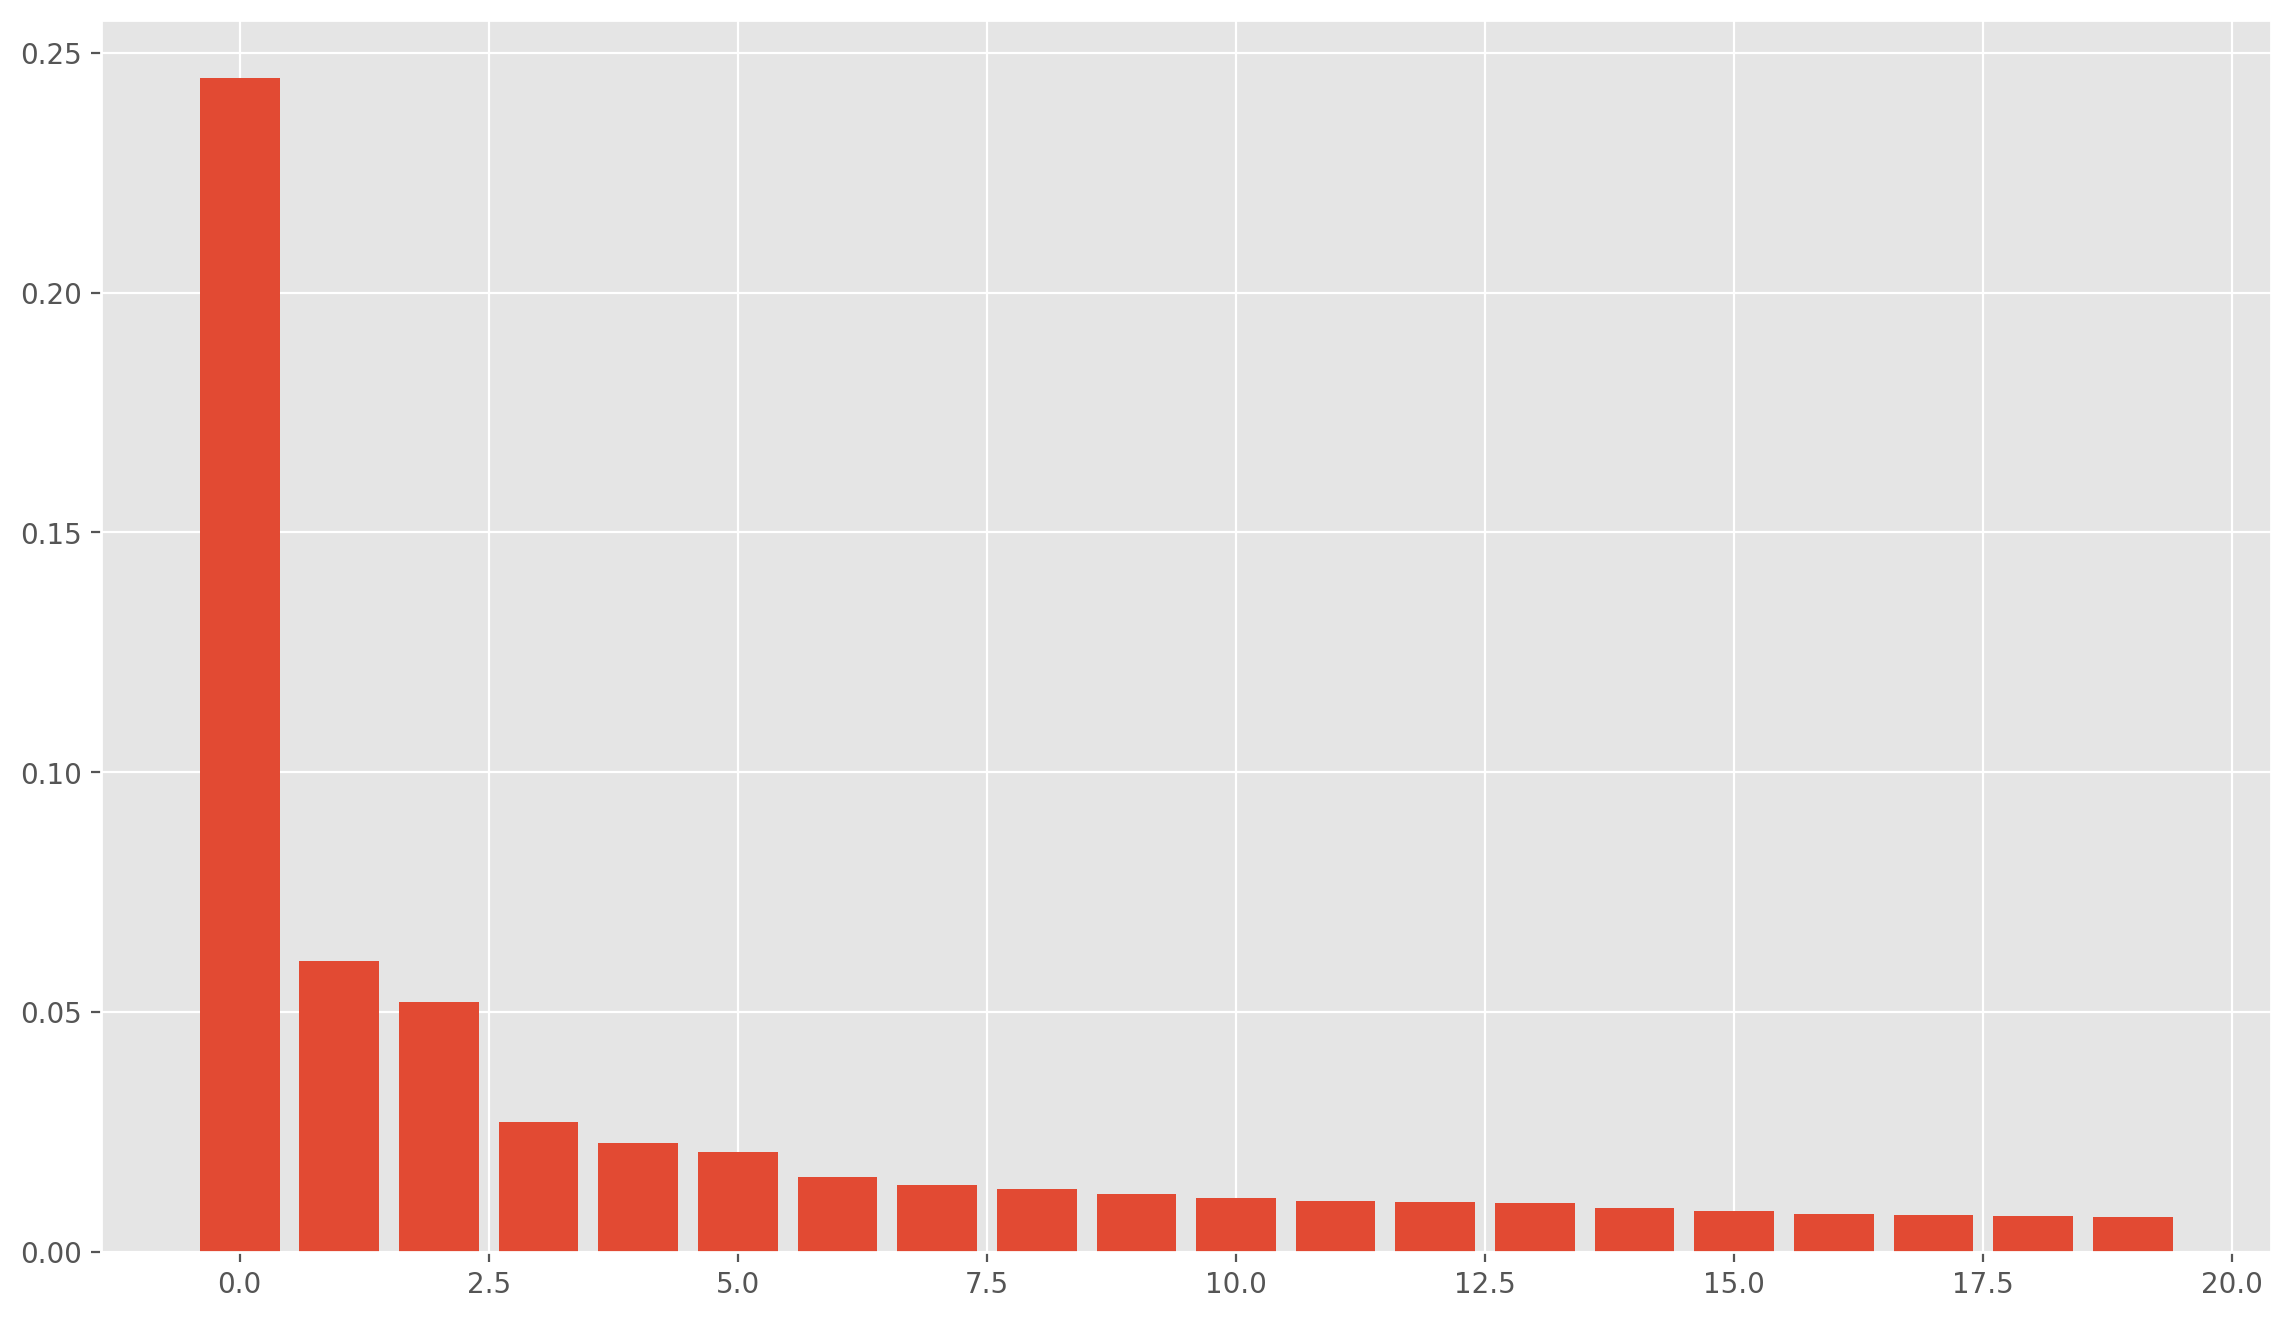

In [18]:
#PCA percent of variance explained by each factor
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_)

In [19]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    assert len(factor_beta_indices.shape) == 1
    assert len(factor_beta_columns.shape) == 1
    
    return pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)

In [20]:
risk_model = {}
risk_model['factor_betas'] = factor_betas(pca, five_year_returns.columns.values, np.arange(num_factor_exposures))

risk_model['factor_betas']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,0.049639,0.019608,-0.035030,-0.014017,-0.010967,0.042132,0.012409,-0.013950,-0.005137,-0.015020,0.017779,0.004899,-0.001812,0.025176,-0.007166,0.025839,-0.021013,-0.001159,0.008970,0.015131
AA,0.077970,-0.024192,0.044047,0.025874,-0.042572,0.031420,0.037874,0.005470,-0.032685,0.059400,-0.098129,-0.087108,-0.057057,0.030546,-0.044055,0.068326,-0.076053,-0.048333,0.085214,0.049288
AAL,0.061927,0.022613,-0.054668,0.055941,-0.017911,0.008814,0.034780,0.020330,-0.033300,-0.005605,-0.062492,0.015009,0.038328,-0.050576,-0.047304,0.021968,-0.052842,0.034182,-0.014442,-0.023831
AAP,0.037195,0.006390,-0.027613,0.009146,0.034472,-0.081782,-0.020768,-0.026983,-0.016653,-0.007114,0.034363,0.028865,-0.013018,-0.056616,-0.014750,-0.010216,0.016718,-0.018024,-0.021173,0.031348
ABBV,0.040673,0.012562,-0.035108,-0.014370,0.049882,0.034472,-0.004706,-0.031942,-0.010217,-0.040417,0.028630,0.023987,0.015903,0.032222,-0.012018,0.053295,-0.033286,-0.043169,0.032732,0.058399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.047151,0.006456,-0.012974,-0.007062,-0.041458,0.008576,-0.017303,0.007006,-0.002662,0.030711,0.006903,-0.046916,-0.020077,-0.000795,0.019811,0.022025,-0.036250,-0.010815,0.014388,-0.007556
YUM,0.031312,0.015257,-0.035836,-0.031408,-0.015849,0.006105,-0.011434,-0.021117,-0.012164,-0.029875,0.009408,0.006308,0.006933,-0.001792,0.000486,-0.013756,0.017585,0.002349,-0.019233,-0.005529
ZBH,0.036652,0.013625,-0.027829,-0.026500,0.021369,0.023674,0.001529,-0.014691,0.001431,-0.014867,0.027496,0.027462,0.014540,0.026822,-0.014611,0.050357,-0.003010,0.014272,0.019126,0.007553
ZION,0.061402,-0.003021,-0.003764,0.086287,-0.037601,-0.010379,-0.103043,0.013689,0.034912,-0.045407,-0.034292,0.014899,0.020924,0.043906,0.028021,-0.028599,0.044289,0.006416,-0.014038,-0.032670


In [24]:
def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    """
    Get the factor returns from the PCA model.

    Parameters
    ----------
    pca : PCA
        Model fit to returns
    returns : DataFrame
        Returns for each ticker and date
    factor_return_indices : 1 dimensional Ndarray
        Factor return indices
    factor_return_columns : 1 dimensional Ndarray
        Factor return columns

    Returns
    -------
    factor_returns : DataFrame
        Factor returns
    """
    assert len(factor_return_indices.shape) == 1
    assert len(factor_return_columns.shape) == 1
    
    return pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)

<Axes: xlabel='Date'>

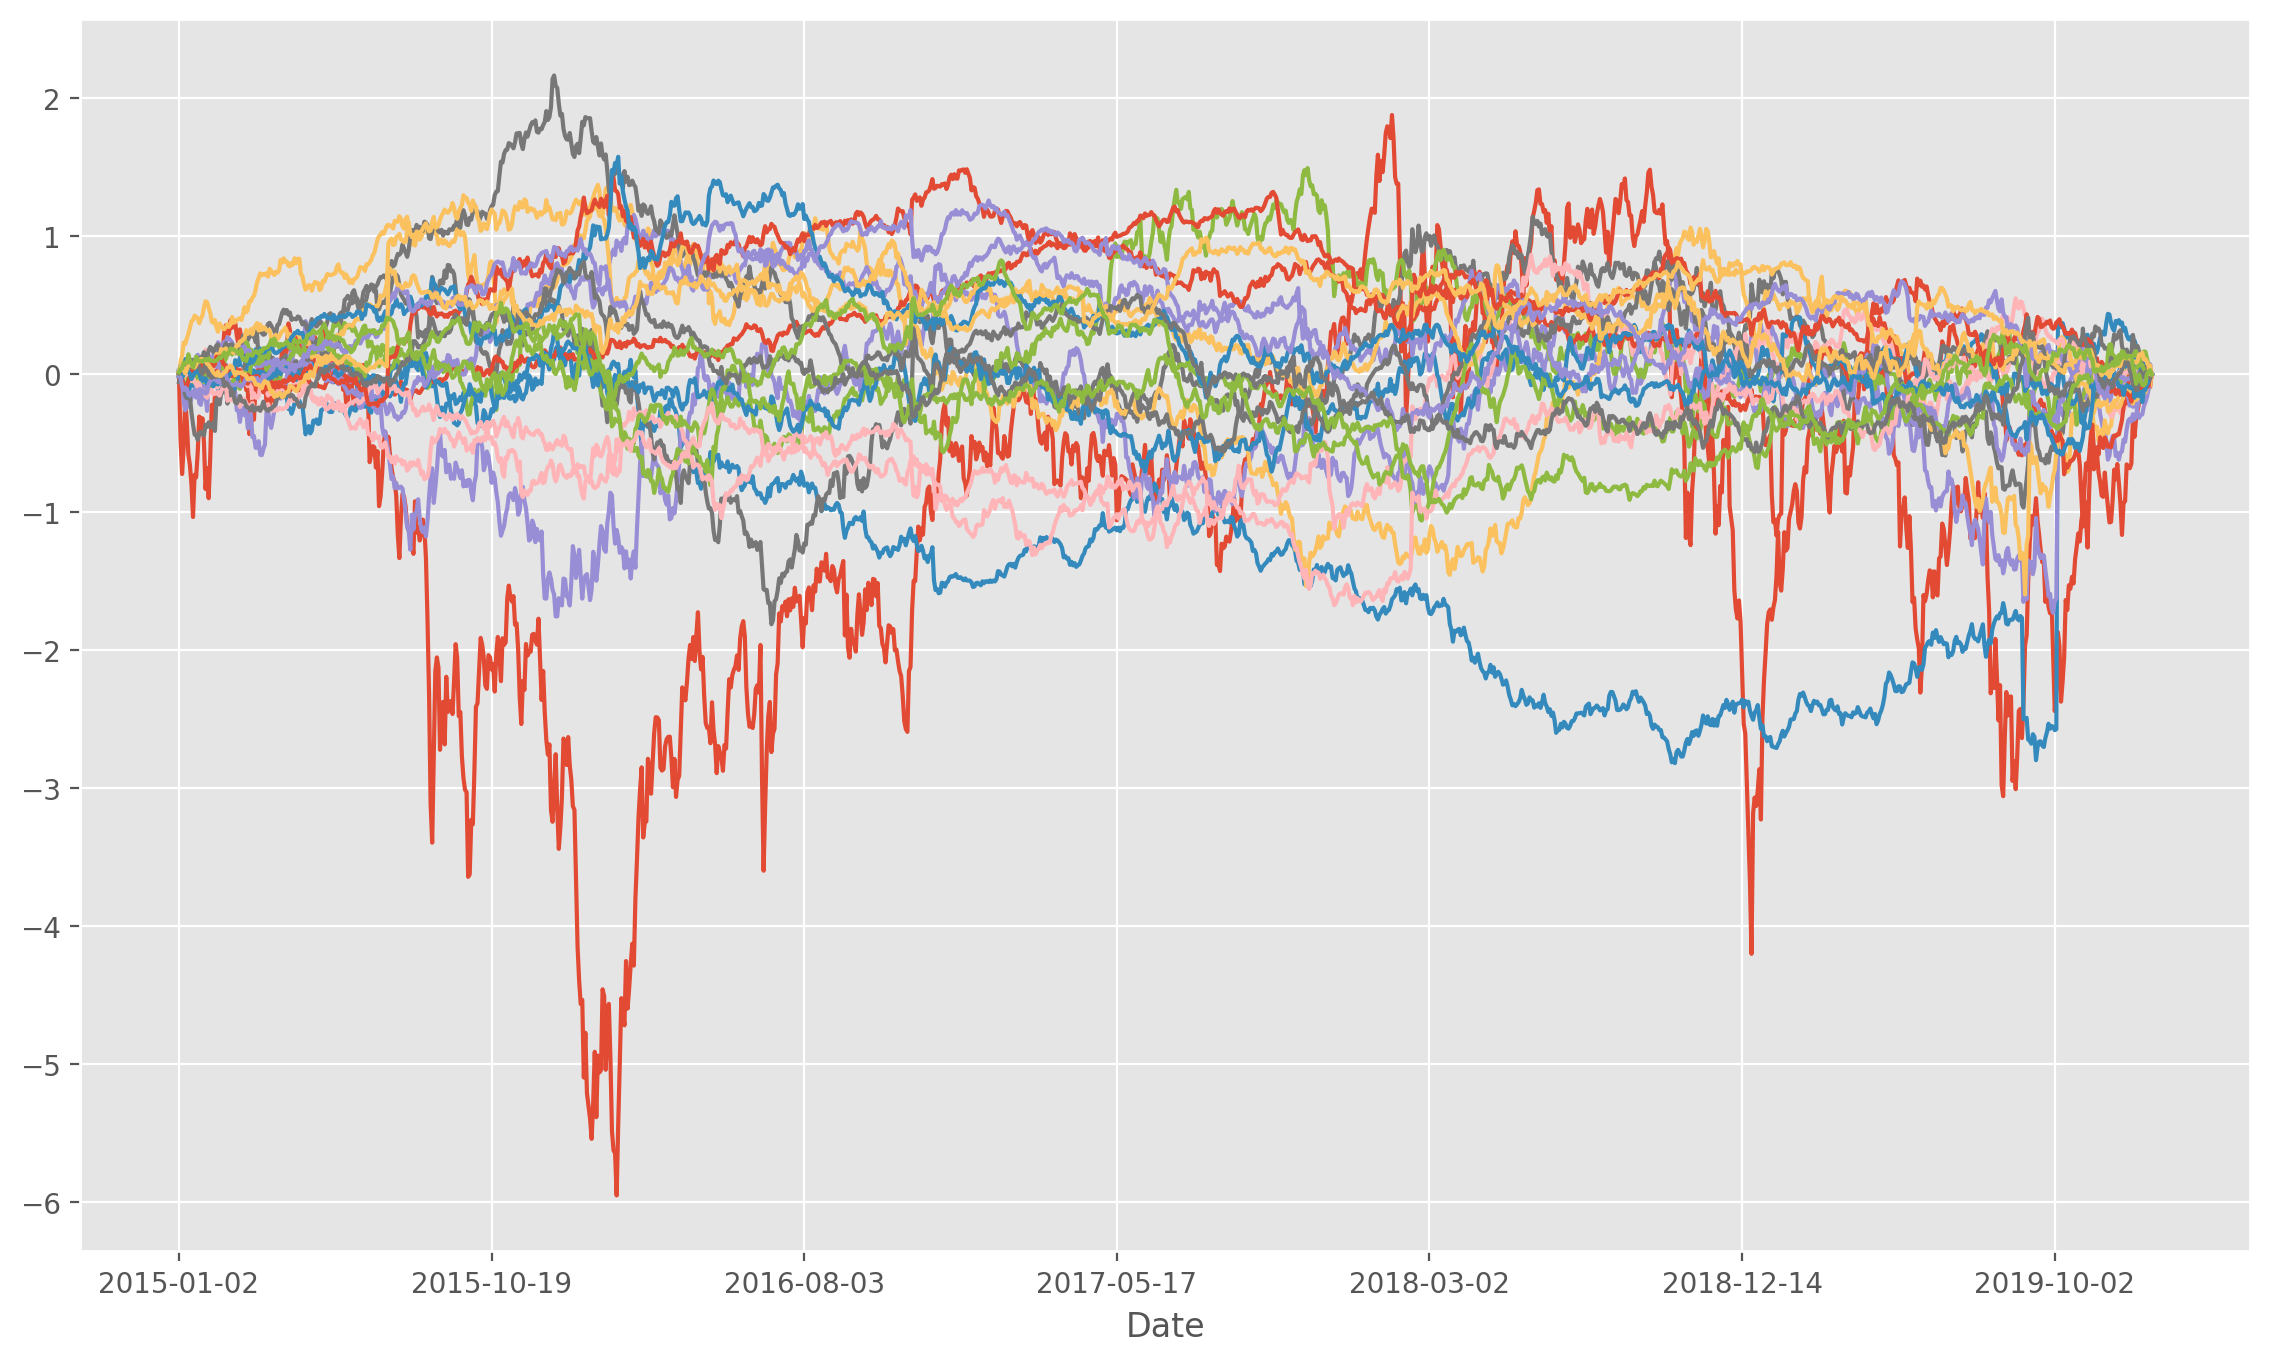

In [25]:
risk_model['factor_returns'] = factor_returns(
    pca,
    five_year_returns,
    five_year_returns.index,
    np.arange(num_factor_exposures))

risk_model['factor_returns'].cumsum().plot(legend=None)

In [26]:
def factor_cov_matrix(factor_returns, ann_factor):
    """
    Get the factor covariance matrix

    Parameters
    ----------
    factor_returns : DataFrame
        Factor returns
    ann_factor : int
        Annualization factor

    Returns
    -------
    factor_cov_matrix : 2 dimensional Ndarray
        Factor covariance matrix
    """
    return np.diag(factor_returns.var(axis=0, ddof=1)*ann_factor)


In [27]:
ann_factor = 252
risk_model['factor_cov_matrix'] = factor_cov_matrix(risk_model['factor_returns'], ann_factor)

risk_model['factor_cov_matrix']

array([[9.44292457, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.33955369, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 2.01181678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.04206612, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [28]:
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    common_return = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    residual = returns - common_return
    
    return pd.DataFrame(np.diag(np.var(residual))*ann_factor, returns.columns, returns.columns)


In [30]:
risk_model['idiosyncratic_var_matrix'] = idiosyncratic_var_matrix(five_year_returns, risk_model['factor_returns'], risk_model['factor_betas'], ann_factor)

risk_model['idiosyncratic_var_matrix']

,A,AA,AAL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,0.023374,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
AA,0.000000,0.087174,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
AAL,0.000000,0.000000,0.073259,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
AAP,0.000000,0.000000,0.000000,0.073792,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
ABBV,0.000000,0.000000,0.000000,0.000000,0.052751,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.019544,0.000000,0.000000,0.00000,0.000000
YUM,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.030338,0.000000,0.00000,0.000000
ZBH,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.029759,0.00000,0.000000
ZION,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.01676,0.000000


In [33]:
def idiosyncratic_var_vector(returns, idiosyncratic_var_matrix):
    return pd.DataFrame(np.max(idiosyncratic_var_matrix, axis=0))


In [34]:
risk_model['idiosyncratic_var_vector'] = idiosyncratic_var_vector(five_year_returns, risk_model['idiosyncratic_var_matrix'])

risk_model['idiosyncratic_var_vector'].head()

,0
A,0.023374
AA,0.087174
AAL,0.073259
AAP,0.073792
ABBV,0.052751


Portfolio risk = $\sigma(P)$ = $\sigma(r_{p})$ = $\sqrt{X^{T}(BFB^{T} + S)X}$

$X$ is the portfolio weights\
$B$ is the factor betas\
$F$ is the factor covariance matrix\
$S$ is the idiosyncratic variance matrix

In [39]:
def predict_portfolio_risk(factor_betas, factor_cov_matrix, idiosyncratic_var_matrix, weights):
    """
    Get the predicted portfolio risk
    
    Formula for predicted portfolio risk is sqrt(X.T(BFB.T + S)X) where:
      X is the portfolio weights
      B is the factor betas
      F is the factor covariance matrix
      S is the idiosyncratic variance matrix


    Returns
    -------
    predicted_portfolio_risk : float
        Predicted portfolio risk
    """
    bf_term = np.dot(np.dot(factor_betas, factor_cov_matrix), factor_betas.T) + idiosyncratic_var_matrix
    variance_risk = np.dot(np.dot(weights.T, bf_term), weights)
    print(variance_risk)
    return float(np.sqrt(variance_risk))

In [50]:
universe_tickers = list(snp_securities_df.columns)
all_weights = pd.DataFrame(np.repeat(1/len(universe_tickers), len(universe_tickers)), universe_tickers)

predict_portfolio_risk(
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_matrix'],
    all_weights)

[[0.01908556]]


0.1381505061440512

ModuleNotFoundError: No module named 'zipline'